In [1]:
import pandas as pd

The 3 Questions:
    
- Do certain professions retire at an earlier age?
- What factors influence early retirement?
- How has retirement age changed overtime for everyone?

In [3]:
retirees_df = pd.read_excel(open('data/Previous jobs of retireees - cleaned.xlsx', 'rb'),
              sheet_name='Data 4.1')
retirees_df.head()

,Year,Population of Interest,Sex,Classification,Category,54 years and under,55 - 59 years,60 - 64 years,65 - 69 years,70 years and over,Total,Average age at retirement years
0,2014-15,People aged 45 years and over,Persons,Status in employment of last job,Had a job in the last 20 years,652.118,560.437,633.426,384.288,170.014,2400.282,58.360
1,2014-15,People aged 45 years and over,Persons,Status in employment of last job,Employee,546.831,430.717,484.554,274.565,108.509,1845.176,57.752
2,2014-15,People aged 45 years and over,Persons,Status in employment of last job,with paid leave entitlements,352.237,331.567,374.089,201.877,67.135,1326.904,58.201
3,2014-15,People aged 45 years and over,Persons,Status in employment of last job,without paid leave entitlements,194.594,99.151,110.465,72.688,41.375,518.272,56.601
4,2014-15,People aged 45 years and over,Persons,Status in employment of last job,Owner manager,82.123,112.822,134.598,104.000,59.367,492.909,61.017


In [4]:
population_df = pd.read_excel(open('data/Populations by State and Teritory - cleaned.xlsx', 'rb'),
              sheet_name='Data 13.1')
population_df.head()

,Year,Population of Interest,Sex,Classification,Category,New South Wales,Victoria,Queensland,South Australia,Western Australia,Tasmania,Northern Territory,Australian Capital Territory,Australia
0,2014-15,P01 - All people aged 45 years and over,Persons,Scope,P01 - All people aged 45 years and over,2873.598,2215.417,1721.291,689.103,886.740,225.157,63.577,130.546,8805.428
1,2014-15,P01 - All people aged 45 years and over,Persons,Scope,P02 - People who were working or had worked be...,2759.483,2134.037,1674.521,671.861,870.586,220.058,61.797,126.827,8519.170
2,2014-15,P01 - All people aged 45 years and over,Persons,Scope,P03 - People who had never worked before,114.116,81.380,46.770,17.242,16.155,5.098,1.780,3.718,286.258
3,2014-15,P01 - All people aged 45 years and over,Persons,Labour force status,P04 - People in the labour force,1480.193,1216.047,891.244,349.624,507.451,111.027,47.879,79.346,4682.812
4,2014-15,P01 - All people aged 45 years and over,Persons,Labour force status,P05 - Employed people,1421.700,1158.283,858.446,334.831,495.982,106.863,47.433,78.230,4501.768


In [21]:
retirees_df['Classification'].unique()

array(['Status in employment of last job',
       'Usual weekly hours worked in last job', 'Occupation of last job',
       'Skill level of last job', 'Industry of last job', 'TOTAL'],
      dtype=object)

In [27]:
retirees_df.loc[retirees_df['Classification'] == 'Industry of last job']['Category'].unique()

array(['Agriculture, forestry and fishing', 'Mining', 'Manufacturing',
       'Electricity, gas, water and waste services', 'Construction',
       'Wholesale trade', 'Retail trade',
       'Accommodation and food services',
       'Transport, postal and warehousing',
       'Information Media and telecommunications',
       'Financial and insurance services',
       'Rental, hiring and real estate services',
       'Professional, scientific and technical services',
       'Administrative and support services',
       'Public administration and safety', 'Education and training',
       'Health care and social assistance',
       'Arts and recreation services', 'Other services'], dtype=object)

# Do certain professions retire at an earlier age?

In [22]:
industry_condition = (retirees_df['Classification'] = 'Industry of last job')
gender_condition = (retirees_df['Sex'] == 'Persons') # Keeping all genders
list_states = ['New South Wales',
'Victoria',
'Queensland',
'South Australia',
'Western Australia',
'Tasmania',
'Northern Territory',
'Australian Capital Territory'
] # only exploring state level information
state_condition = (retirees_df['Population of Interest'].isin(list_states))



retirement_df = retirees_df.loc[industry_condition & gender_condition & state_condition] # applying all conditions
retirement_df

,Year,Population of Interest,Sex,Classification,Category,54 years and under,55 - 59 years,60 - 64 years,65 - 69 years,70 years and over,Total,Average age at retirement years
1561,2014-15,New South Wales,Persons,Industry of last job,"Agriculture, forestry and fishing",2.489,0.529,7.398,0.000,4.389,14.805,64.666
1562,2014-15,New South Wales,Persons,Industry of last job,Mining,0.000,2.272,2.057,2.323,0.000,6.652,62.190
1563,2014-15,New South Wales,Persons,Industry of last job,Manufacturing,27.878,20.431,20.648,20.851,9.359,99.168,58.729
1564,2014-15,New South Wales,Persons,Industry of last job,"Electricity, gas, water and waste services",1.408,2.841,8.509,3.050,0.000,15.808,60.054
1565,2014-15,New South Wales,Persons,Industry of last job,Construction,13.452,9.563,12.276,3.667,2.077,41.035,56.476
...,...,...,...,...,...,...,...,...,...,...,...,...
16416,2020-21,Australian Capital Territory,Persons,Industry of last job,Public administration and safety,1.726,7.469,3.950,4.344,0.000,17.489,59.367
16417,2020-21,Australian Capital Territory,Persons,Industry of last job,Education and training,0.000,1.347,1.209,0.443,0.000,3.000,60.231
16418,2020-21,Australian Capital Territory,Persons,Industry of last job,Health care and social assistance,0.684,1.326,0.701,0.960,0.000,3.671,59.636
16419,2020-21,Australian Capital Territory,Persons,Industry of last job,Arts and recreation services,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [23]:
# years presentr in the dataset

retirement_df.Year.unique()

array(['2014-15', '2016-17', '2018-19', '2020-21'], dtype=object)

In [24]:
avg_retirement_age = retirement_df.groupby('Category')['Average age at retirement years'].mean().sort_values()
avg_retirement_age

Category
Financial and insurance services                   48.167812
Electricity, gas, water and waste services         48.836750
Mining                                             50.884813
Information Media and telecommunications           51.265219
Agriculture, forestry and fishing                  52.085656
Rental, hiring and real estate services            52.455281
Manufacturing                                      52.934750
Wholesale trade                                    54.228031
Arts and recreation services                       54.827781
Administrative and support services                54.922875
Other services                                     57.319500
Accommodation and food services                    57.800562
Retail trade                                       58.038000
Health care and social assistance                  59.814750
Public administration and safety                   59.912312
Construction                                       60.041156
Education and t

<AxesSubplot:xlabel='Category'>

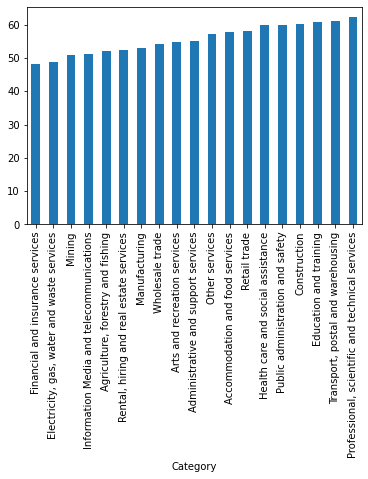

In [25]:
avg_retirement_age.plot(kind='bar')

In [26]:
avg_retirement_age.nsmallest(n=5, keep='first')

Category
Financial and insurance services              48.167812
Electricity, gas, water and waste services    48.836750
Mining                                        50.884813
Information Media and telecommunications      51.265219
Agriculture, forestry and fishing             52.085656
Name: Average age at retirement years, dtype: float64

In [28]:
med_retirement_age = retirement_df.groupby('Category')['Average age at retirement years'].median().sort_values()
med_retirement_age

Category
Administrative and support services                57.4865
Accommodation and food services                    57.6080
Financial and insurance services                   57.7515
Retail trade                                       57.8765
Manufacturing                                      58.3165
Rental, hiring and real estate services            58.3705
Information Media and telecommunications           58.5450
Other services                                     59.4330
Public administration and safety                   59.6490
Health care and social assistance                  59.6700
Wholesale trade                                    59.7155
Electricity, gas, water and waste services         59.7920
Education and training                             60.0245
Arts and recreation services                       60.1245
Mining                                             60.2900
Transport, postal and warehousing                  60.6655
Construction                                   

<AxesSubplot:xlabel='Category'>

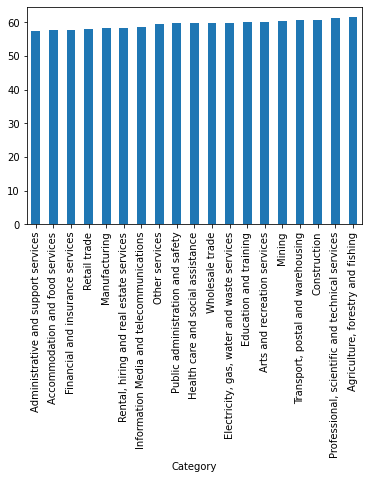

In [29]:
med_retirement_age.plot(kind='bar')

In [30]:
med_retirement_age.nsmallest(n=5, keep='first')

Category
Administrative and support services    57.4865
Accommodation and food services        57.6080
Financial and insurance services       57.7515
Retail trade                           57.8765
Manufacturing                          58.3165
Name: Average age at retirement years, dtype: float64